Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, f1_score

Loading The Dataset

In [8]:
dataset = pd.read_csv("..\dataset\creditcard.csv")

## Data Exploration

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(dataset.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Checking Missing Value

In [9]:
print(dataset.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Data Analysis and Visualization

### Features Distribution

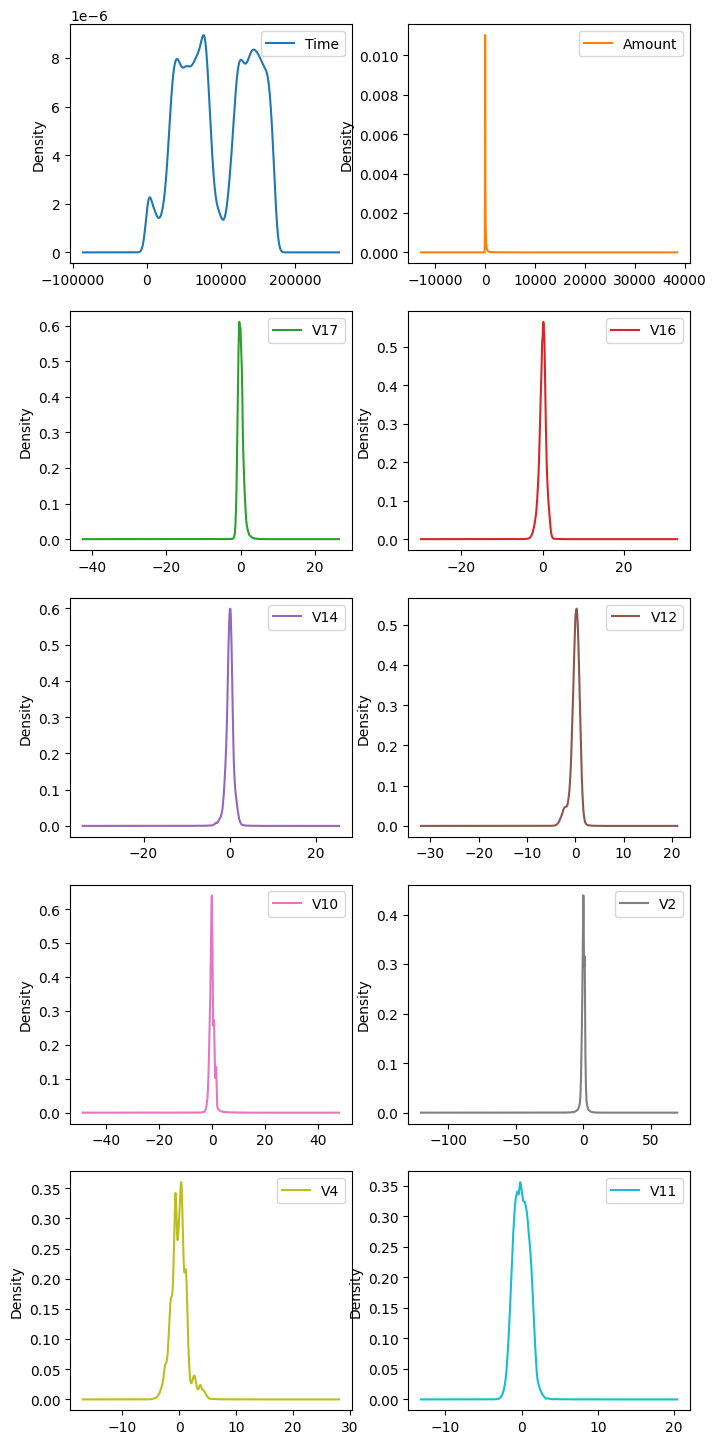

In [10]:
density_columns = ['Time', 'Amount', 'V17', 'V16', 'V14', 'V12', 'V10', 'V2', 'V4', 'V11']
dataset[density_columns].plot(kind='density', subplots=True, layout=(5, 2), sharex=False, figsize=(8, 18))
plt.show()

#### Scaled Feature ('Time', 'Amount')
- Since most of our data has already been scaled we should scale the columns that are left to scale (Time, Amount)
- We use RobustScaler, that is less prone to outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
robust_scaler = RobustScaler()

dataset['scaled_amount'] = robust_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = robust_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

dataset.head()

### Split Dataset to Train and Test

In [ ]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X = dataset[ind_col]
y = dataset[dep_col]

In [ ]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X = dataset[ind_col]
y = dataset[dep_col]

## Class Distributions

Ckecking Class Distributions

In [ ]:
print('No Frauds : ', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '%')
print('Frauds : ', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '%')

In [ ]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="Class", data=dataset, palette="Set1")
plt.title('Class Distributions \n 0: No Frauds \n 1: Frauds', fontsize=14)
plt.show()

#### Correlation Heatmap

In [ ]:
plt.figure(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Imbalanced Correlation Heatmap')
plt.show()

### Address the unbalanced data issue by trying Oversampling (SMOTE Method)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 4)
X_os, y_os = sm.fit_resample(X_train, y_train)

X_os.shape

In [ ]:
dataset_Oversampling = pd.concat([X_os, y_os], axis=1)

Ckecking Class Distributions

In [ ]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="Class", data=dataset_Oversampling, palette="Set1")
plt.title('Class Distributions (Oversampling) \n 0: No Frauds \n 1: Frauds', fontsize=14)
plt.show()

#### Correlation Heatmap

In [ ]:
plt.figure(figsize=(10, 8))
corr = dataset_Oversampling.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Oversampling Correlation Heatmap')
plt.show()

## Analyze Most Important Negative Correlations (Fraud Transaction):

In [ ]:
corr_columns = ['V17', 'V16', 'V14', 'V12', 'V10']

fig, axes = plt.subplots(1, 5, figsize=(25, 7))

# Loop through columns for visualization
for idx, num_col in enumerate(corr_columns):
    sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {num_col} by Class', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

#### Remove Extreme Outliers of Features (V14, V12, V10) for Fraud Cases

From Oversampling Dataset: X_os, y_os

In [ ]:
# We get all values of feature 'V14' where 'Class' equal to 1
v14_fraud = dataset_Oversampling['V14'].loc[dataset_Oversampling['Class'] == 1].values
q25 = np.percentile(v14_fraud, 25)
q75 = np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
print('Feature V14: \niqr: {}'.format(v14_iqr))

v14_threshold = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_threshold, q75 + v14_threshold
print('Threshold: {}'.format(v14_threshold))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling = dataset_Oversampling.drop(dataset_Oversampling[(dataset_Oversampling['V14'] > v14_upper) | (dataset_Oversampling['V14'] < v14_lower)].index)

In [ ]:
# We get all values of feature 'V12' where 'Class' equal to 1
v12_fraud = dataset_Oversampling['V12'].loc[dataset_Oversampling['Class'] == 1].values
q25 = np.percentile(v12_fraud, 25)
q75 = np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
print('Feature V12: \niqr: {}'.format(v12_iqr))

v12_threshold = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_threshold, q75 + v12_threshold
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling = dataset_Oversampling.drop(dataset_Oversampling[(dataset_Oversampling['V12'] > v12_upper) | (dataset_Oversampling['V12'] < v12_lower)].index)

In [ ]:
# We get all values of feature 'V12' where 'Class' equal to 1
v10_fraud = dataset_Oversampling['V10'].loc[dataset_Oversampling['Class'] == 1].values
q25 = np.percentile(v10_fraud, 25)
q75 = np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
print('Feature V10: \niqr: {}'.format(v10_iqr))

v10_threshold = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_threshold, q75 + v10_threshold
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling = dataset_Oversampling.drop(dataset_Oversampling[(dataset_Oversampling['V10'] > v10_upper) | (dataset_Oversampling['V10'] < v10_lower)].index)

## Analyze Most Important Positive Correlations (Fraud Transaction):

In [ ]:
corr_columns = ['V11', 'V4', 'V2']

fig, axes = plt.subplots(1, 3, figsize=(25, 7))

# Loop through columns for visualization
for idx, num_col in enumerate(corr_columns):
    sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {num_col} by Class', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

#### Remove Extreme Outliers of Features (V11, V2) for Fraud Cases

From Oversampling Dataset: X_os, y_os

In [ ]:
# We get all values of feature 'V11' where 'Class' equal to 1
v11_fraud = dataset_Oversampling['V11'].loc[dataset_Oversampling['Class'] == 1].values
q25 = np.percentile(v11_fraud, 25)
q75 = np.percentile(v11_fraud, 75)
v11_iqr = q75 - q25
print('Feature V11: \niqr: {}'.format(v11_iqr))

v11_threshold = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_threshold, q75 + v11_threshold
print('Threshold: {}'.format(v11_threshold))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling = dataset_Oversampling.drop(dataset_Oversampling[(dataset_Oversampling['V11'] > v11_upper) | (dataset_Oversampling['V11'] < v11_lower)].index)

In [ ]:
# We get all values of feature 'V2' where 'Class' equal to 1
v2_fraud = dataset_Oversampling['V2'].loc[dataset_Oversampling['Class'] == 1].values
q25 = np.percentile(v2_fraud, 25)
q75 = np.percentile(v2_fraud, 75)
v2_iqr = q75 - q25
print('Feature V2: \niqr: {}'.format(v2_iqr))

v2_threshold = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_threshold, q75 + v2_threshold
print('Threshold: {}'.format(v2_threshold))
print('V2 Lower: {}'.format(v2_lower))
print('V2 Upper: {}'.format(v2_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling = dataset_Oversampling.drop(dataset_Oversampling[(dataset_Oversampling['V2'] > v2_upper) | (dataset_Oversampling['V2'] < v2_lower)].index)

#### Remove 'Class' Variable

In [ ]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X_os_train = dataset_Oversampling[ind_col]
y_os_train = dataset_Oversampling[dep_col]

# Classifier Models

## Decision Tree

#### Decision Tree without Pruning

In [ ]:
Credit_score_clf = DecisionTreeClassifier(random_state=10)

Credit_score_clf.fit(X_os_train, y_os_train)

In [ ]:
# Plot the decision tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(20,10))
plot_tree(Credit_score_clf, filled=True, feature_names=list(X_os_train), class_names= list(y_os_train.unique().astype(str)))
plt.show()

Training Score / Accuracy Score

In [ ]:
y_train_pred = Credit_score_clf.predict(X_os_train)

t_score = accuracy_score(y_os_train, y_train_pred)
print(f'Training Score: {t_score}')


y_pred = Credit_score_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

Confusion Matrix

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Decision Tree Confusion Matrix")
plt.show()

#### Decision Tree with Pruning
Hyperparameter Tuning using GridSearchCV